In [1]:
import cv2
import os
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt

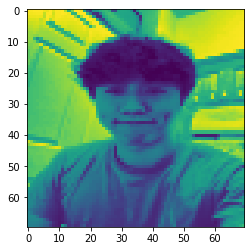

In [2]:
image = cv2.imread('training_data/jun/IMG_0421.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray, (70, 70), interpolation=cv2.INTER_AREA)
final = cv2.equalizeHist(resized_img)
plt.imshow(final)

In [3]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [4]:
model =Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [5]:
TRAINING_DIR = "../Train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))

Found 10003 images belonging to 2 classes.


In [6]:
VALIDATION_DIR = "../Validation"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1792 images belonging to 2 classes.


In [7]:
checkpoint = ModelCheckpoint('model3-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [8]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

C:\Users\DrNuj\AppData\Local\Temp/ipykernel_5660/3620006576.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
1001/1001 [==============================] - 171s 168ms/step - loss: 0.2882 - acc: 0.8826 - val_loss: 0.1467 - val_acc: 0.9498
Epoch 2/10
1001/1001 [==============================] - 113s 113ms/step - loss: 0.2120 - acc: 0.9186 - val_loss: 0.1928 - val_acc: 0.9286
Epoch 3/10
1001/1001 [==============================] - 131s 131ms/step - loss: 0.1885 - acc: 0.9321 - val_loss: 0.1360 - val_acc: 0.9587
Epoch 4/10
1001/1001 [==============================] - 114s 114ms/step - loss: 0.1735 - acc: 0.9356 - val_loss: 0.0911 - val_acc: 0.9721
Epoch 5/10
1001/1001 [==============================] - 115s 115ms/step - loss: 0.1681 - acc: 0.9395 - val_loss: 0.1017 - val_acc: 0.9693
Epoch 6/10
1001/1001 [==============================] - 112s 111ms/step - loss: 0.1659 - acc: 0.9401 - val_loss: 0.0960 - val_acc: 0.9693
Epoch 7/10
1001/1001 [==============================] - 110s 110ms/step - loss: 0.1577 - acc: 0.9446 - val_loss: 0.0919 - val_acc: 0.9710
Epoch 8/10
1001/1001 [============